## **RSI (Relative Strength Index):**

   - *__Purpose__*: RSI measures the speed and change of price movements to identify overbought or oversold conditions.
   - *__Activation and Usage__*: Use the `talib.RSI` function in Python. RSI values above 70 indicate potential overbought conditions, while values below 30 indicate potential oversold conditions.
   - *__Strategy__*: RSI crossovers of the 70 and 30 levels can signal potential reversals. Divergence between RSI and price trends might indicate upcoming changes.
   - *__Key Points__*: Look for RSI patterns, such as failure swings and bullish/bearish divergences.
   - *__Effective Conditions__*: RSI is effective in ranging markets and can indicate potential trend exhaustion.

In [1]:
import talib
from backtesting.test import GOOG
from backtesting import Backtest , Strategy
from backtesting.lib import crossover
import matplotlib.pyplot as plt
import pandas as pd
print(talib.RSI.__doc__)

c:\Users\eviatar\anaconda3\envs\algoTride\lib\site-packages\backtesting\test\__init__.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(join(dirname(__file__), filename),
c:\Users\eviatar\anaconda3\envs\algoTride\lib\site-packages\backtesting\test\__init__.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.read_csv(join(dirname(__file__), filename),


 RSI(real[, timeperiod=?])

    Relative Strength Index (Momentum Indicators)

    Inputs:
        real: (any ndarray)
    Parameters:
        timeperiod: 14
    Outputs:
        real
    


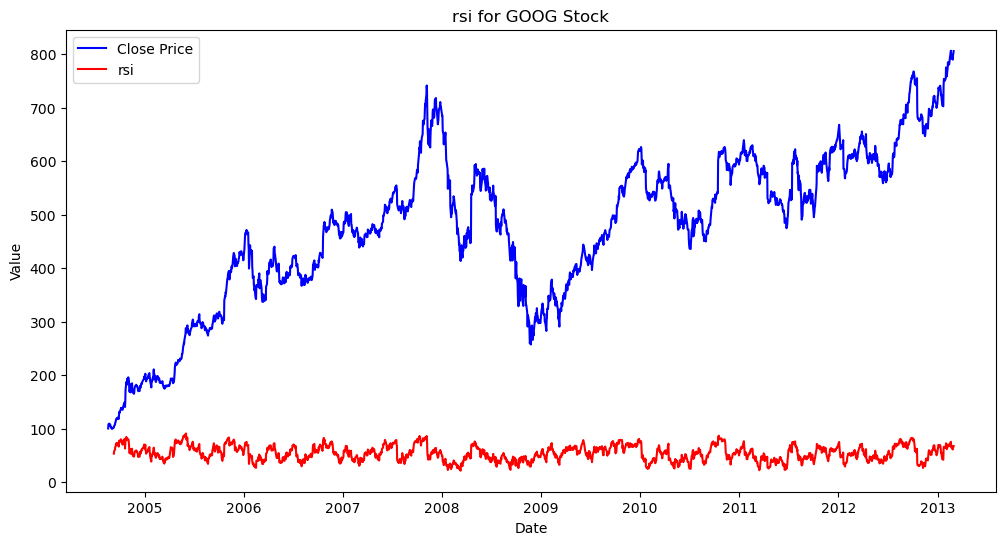

2004-08-19          NaN
2004-08-20          NaN
2004-08-23          NaN
2004-08-24          NaN
2004-08-25          NaN
                ...    
2013-02-25    61.477295
2013-02-26    61.050100
2013-02-27    64.999388
2013-02-28    65.552880
2013-03-01    67.497983
Length: 2148, dtype: float64


In [2]:
close_prices = GOOG['Close']
timeperiod = 14

# Calculate the MACD, MACD Signal, and MACD Histogram
rsi = talib.RSI(close_prices, timeperiod=timeperiod)

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the Close prices
plt.plot(GOOG.index, close_prices, label='Close Price', color='blue')

# Plot the Bollinger Bands
plt.plot(GOOG.index, rsi, label='rsi', color='red')

# Add legend
plt.legend()

# Add title and labels
plt.title('rsi for GOOG Stock')
plt.xlabel('Date')
plt.ylabel('Value')

# Show the plot
plt.show()
print (rsi)

In [4]:
def optim_func(series):
    if series['# Trades'] < 15:
        return -1
    
    return  series['Equity Final [$]'] * 0.2 + series['Profit Factor'] *  series['Win Rate [%]'] 

class RsiOscillator(Strategy):
    upper_bound = 70
    lower_bound = 30
    rsi_windows = 14

    def init(self):
        self.rsi = self.I(talib.RSI, self.data.Close, self.rsi_windows)

    def next(self):
        if crossover(self.rsi, self.upper_bound):
            self.position.close()
        elif crossover(self.lower_bound, self.rsi):
            self.buy()

bt = Backtest(GOOG, RsiOscillator, cash=10_000, commission=0)
# stats = bt.run()
stats = bt.optimize(
    upper_bound = range(75, 95, 7),
    lower_bound = range(5, 32, 7),
    rsi_windows = range(4, 22, 3),
    maximize= optim_func,
    max_tries=100)
bt.plot()
print(stats)

c:\Users\eviatar\anaconda3\envs\algoTride\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
c:\Users\eviatar\anaconda3\envs\algoTride\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],


Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                    53.77095
Equity Final [$]                     36413.61
Equity Peak [$]                      36483.36
Return [%]                           264.1361
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   16.371487
Volatility (Ann.) [%]               30.678661
Sharpe Ratio                         0.533644
Sortino Ratio                        0.984322
Calmar Ratio                          0.30481
Max. Drawdown [%]                  -53.710396
Avg. Drawdown [%]                   -4.299763
Max. Drawdown Duration      558 days 00:00:00
Avg. Drawdown Duration       44 days 00:00:00
# Trades                                   24
Win Rate [%]                        83.333333
Best Trade [%]                      42.917016
Worst Trade [%]                    -22.791549
Avg. Trade [%]                    

In [5]:
import random

def make_rsi():
    def rsi(timeperiod, upper_bound, lower_bound, weight):
        
        def res(data):
            rsi = talib.RSI(data, timeperiod=timeperiod)
            if rsi[-1] < lower_bound:
                return -weight
            elif rsi[-1] > upper_bound:
                return weight
            return 0
            
        return res

    timeperiod = random.randrange(3, 28, 1)
    upper_bound = random.randrange(65, 94, 1)
    lower_bound = random.randrange(5, 44, 1)
    weight = random.randrange(50, 200, 1)/100
    return rsi(timeperiod, upper_bound, lower_bound, weight)
   

c = make_rsi()         
close_prices = GOOG['Close']
print(c(close_prices))

0
